### Bootstrapping, Multinomial Weights and Bayesian Bootstrapping

...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Generating Data 

Generating sample data to be bootstrapped, which is assumed here to follow standard normal distribution.

In [16]:
np.random.seed(42)  # For reproducibility

ndata = 10000
data = np.random.normal(0, 1, size=ndata)
print(f"mean:{np.mean(data):0.2f}, std:{np.std(data):0.2f}, sample_size:{ndata}")

mean:-0.00, std:1.00, sample_size:10000


### Bootstrapping

In the classic bootstrap, we:

- have observed data that we
- resample (nboots times) with replacement and then like to 
- compute the statistic (mean, quantile, regression coefficient, etc.) on that resample.

In the below, for the simplicity of implementation, let's break down process of generating bootstrap into two steps.
- first, generate a list of random integers (indices) between 0 and ndata with replacement 
- second, apply it to the data to obtain bootstrapped samples.

In [ ]:
# Number of bootstrap samples
nboots = 1000

# Create a default random number generator
rng = np.random.default_rng()

# Sample integers with replacement
# low=0 (inclusive), high=ndata (exclusive), size=num_samples
samples_indices = rng.integers(low=0, high=ndata, size=(ndata, nboots))
samples = data[samples_indices]

print(f"Data mean:{np.mean(data):0.2f}, std:{np.std(data):0.2f}, sample_size:{ndata}")
print(f"Bootstrapped sample mean: {np.mean(samples, axis=0).mean():0.2f}, "
      f"std: {np.std(samples, axis=0).mean():0.2f}, bootstrap_size:{nboots}")

Data mean:-0.00, std:1.00, sample_size:10000
Bootstrapped sample mean: -0.00, std: 1.00, bootstrap_size:10000


When we flatten the *samples_indices* matrix above and plot its histogram, we should expect to see indices are uniformly distributed.

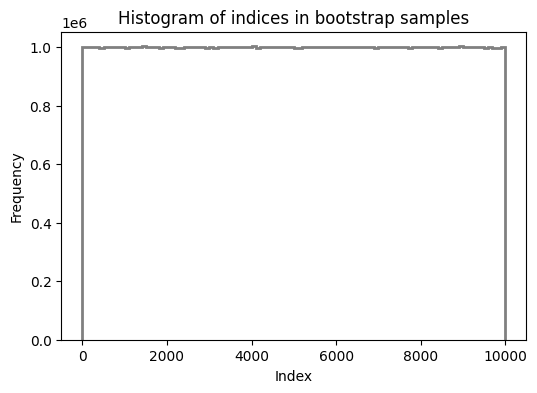

In [20]:
plt.figure(figsize=(6 ,4))
_ = plt.hist(samples_indices.flatten(), bins=100, histtype='step', lw=2, color='gray')
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.title("Histogram of indices in bootstrap samples")
plt.show()

However, interestingly if we count how many times any particular index has repeated over each column or replica, it seems to have follow a multinomial distribution as shown below for a couple of example indices.

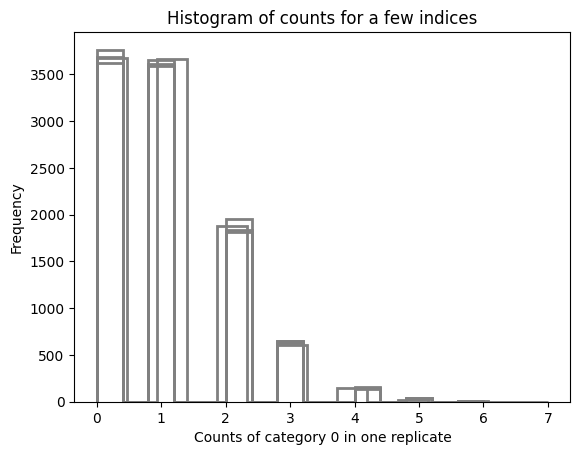

In [21]:
# Compute counts per replicate for say index = 750
# Aka how many times does 750 index appear in each bootstrap sample

for index in [5, 500, 1750, 5000]:
    counts_cat = np.sum(samples_indices==index, axis=0)
    plt.hist(counts_cat, histtype='step', lw=2, color='gray', bins=15)

plt.xlabel("Counts of category 0 in one replicate")
plt.ylabel("Frequency")
plt.title("Histogram of counts for a few indices")
plt.show()

#### Reference

-  Matteo C. blog post on [Bayesian bootstrapping](https://matteo.ghilardi.io/bayesian_bootstrapping/).